# Anomaly Detection: Supervised vs Unsupervised Techniques

## Task

Here you will find our implementation for the Anomaly Detection miniproject. This project was part of our evaluation and project work in DAT550 DATAUTVINNING OG DYPLÆRING.

In this group project, we studied different supervised and unsupervised techniques on dataset of real-life transactions from an
international credit card corporation. Due to imbalanced nature of the dataset, different kinds of under-sampling and over-sampling methods were conducted to make the training set balanced and their effect was compared for different supervised learning techniques such as random forest, logistic regression, K-nearest neighbour and NB classifier. For unsupervised learning, we experimented different algorithms like Isolation Forrest, One-class SVM, deep AutoEncoders, local-outlier factor and etc, and model performances were compared based on different metrics such as precision, sensitivity, and area under ROC curve

### Notebook structure

1. Exploratory Data Analysis
    - 1.1 Gathering the data
    - 1.2 Preprocessing
2. Visualization
    - 2.1 PCA
    - 2.2 Truncated SVD
    - 2.3 t-SNE
3. Supervised Classification
    - 3.1 Imbalanced Random Forest
    - 3.2 Random Forest with Random Undersampling technique
    - 3.3 Random Forest with SMOTE
    - 3.4 Random Forest with ADASYN
    - 3.5 Grid Search with Logistic Regression
    - 3.6 Grid Search with Random Forest
    - 3.7 Grid Search with K Nearest Neighbour
    - 3.8 Logistic Regression
    - 3.9 Random Forest
    - 3.10 NB Classifier
    - 3.11 K-Nearest Neighbour Classifier
4. Unsupervised Learning Methods
    - 4.1 Deep Neural Auto-Encoders
    - 4.2 Sparse Auto-Encoders
    - 4.3 Isolation Forest
    - 4.4 One Class SVM
    - 4.5 Local Outliner Factor (LOF)
    - 4.6 Markov Chain
5. Conclusion

## Environment

To run this project your environment is expected to be an Anaconda base environment with Python version 3.6+ installed.
The following libraries needs to be imported.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime
import keras

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , auc
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve , precision_recall_fscore_support , mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from hmmlearn.hmm import GaussianHMM, GMMHMM
from keras import optimizers
from keras import backend as K  
from keras import losses , regularizers
from keras.models import Sequential, Model
from keras.losses import mse, binary_crossentropy
from keras.layers import Dense, Input, Dropout, Embedding, LSTM , Lambda
from keras.optimizers import RMSprop, Adam, Nadam
from keras.callbacks import TensorBoard
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches


In [2]:
import plotly.graph_objects as go
from plotly.offline import iplot
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn

In [3]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#### Some needs to be installed and not just imported

In [ ]:
# !pip install tensorflow
# !pip install keras
# !pip install plotly
# !pip install seaborn
# !pip install imblearn
# !pip install hmmlearn

## 1. Exploratory Data Analysis

In this section we will retrieve our downloaded datasets into our code and putting them into pandas dataframes for further use. Here we will also modify the dataframes to only get the columns we need to use for our implementation, scale the necessary columns, and find the fraud ratio of our data

### 1.1 Gathering the data

#### Loading The Dataset

In [2]:
filePath = './dataset/creditcard.csv'
df = pd.read_csv(filepath_or_buffer=filePath, header=0, sep=',')
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.2 Preprocessing

In [4]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True,axis=1)
df = df.drop(['Time'] , axis=1)

In [5]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

The following code displays the counts for each type of Transaction, "Fradulant" as well as "Normal"

In [6]:
df.groupby('Class')['Class'].count()

Class
0    283253
1       473
Name: Class, dtype: int64

In [7]:
prec = df[df['Class']==1].shape[0]/df[df['Class']==0].shape[0]
prec

0.0016698852262818046

## 2. Visualization

In this section we will visualize our data to see the imbalance between fraudulent and normal cases. We will do it by a simple visualization, PCA, SVD, t-SNE, and we will do it both on the original dataset and a randomly balanced subset.

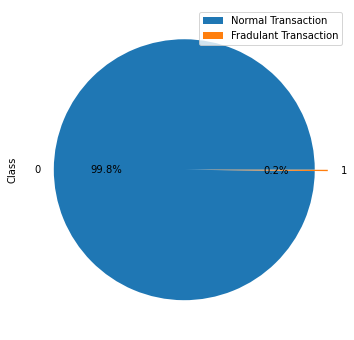

In [8]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%')
plt.legend(["Normal Transaction","Fradulant Transaction"])
plt.show()

#### Creating a balanced dataset with equal frauds and non-frauds

In [11]:
df_sample = df.sample(frac=1)

df_frauds = df_sample.loc[df['Class'] == 1]
df_normal_points = df_sample.loc[df['Class'] == 0][:473]
pd_concat = pd.concat([df_frauds, df_normal_points])
df_balanced = pd_concat.sample(frac=1, random_state=20)


In [12]:
labels = []
non_fraud_labels = mpatches.Patch(color='blue', label='Non Fraud')
fraud_labels = mpatches.Patch(color='red', label='Fraud')
labels.append(non_fraud_labels)
labels.append(fraud_labels)

### 2.1 PCA

#### Doing PCA on original dataset

In [287]:
X = df.drop('Class', axis=1)
y = df['Class']

X_reduced_pca = PCA(n_components=2, random_state=20).fit_transform(X.values)

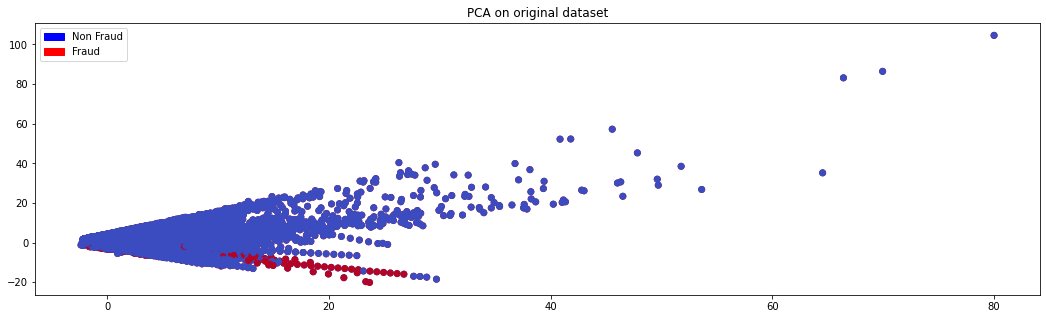

In [288]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('PCA on original dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

#### Doing PCA on balanced dataset

In [289]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_reduced_pca = PCA(n_components=2, random_state=20).fit_transform(X.values)

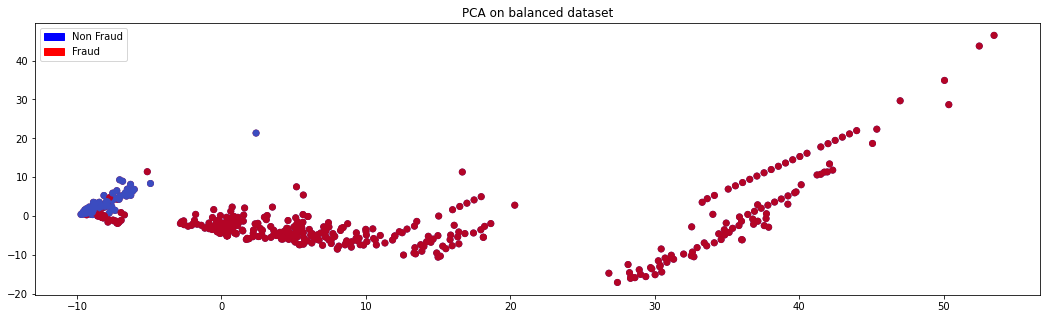

In [290]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('PCA on balanced dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

### 2.2 Truncated SVD

#### Doing TruncatedSVD on original dataset

In [291]:
X = df.drop('Class', axis=1)
y = df['Class']

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=20).fit_transform(X.values)

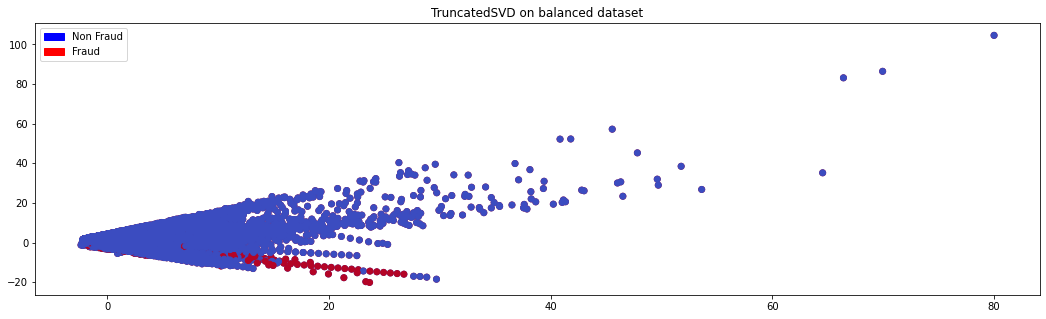

In [292]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('TruncatedSVD on balanced dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

#### TruncatedSVD on balanced dataset

In [293]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=20).fit_transform(X.values)

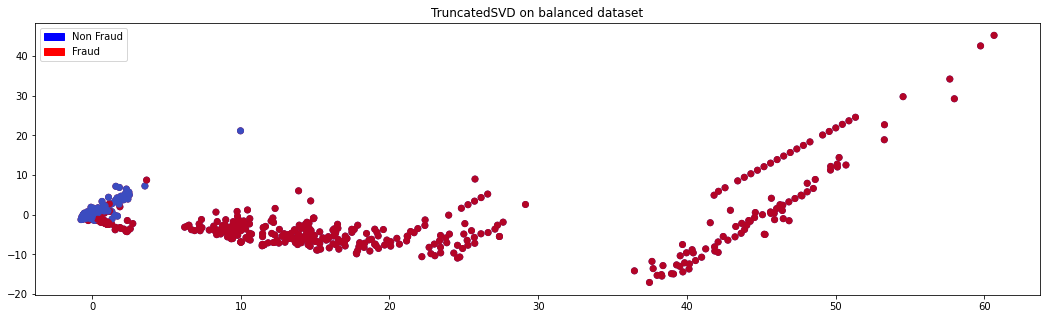

In [294]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('TruncatedSVD on balanced dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

### 2.3 t-SNE

#### Doing t-SNE on the original dataset

In [295]:
X = df.drop('Class', axis=1)
y = df['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

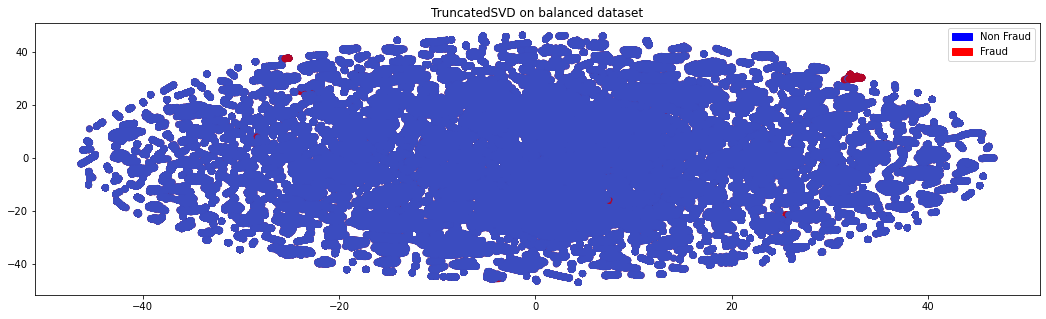

In [296]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('TruncatedSVD on balanced dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

#### Doing t-SNE on the balanced dataset

In [297]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=20).fit_transform(X.values)

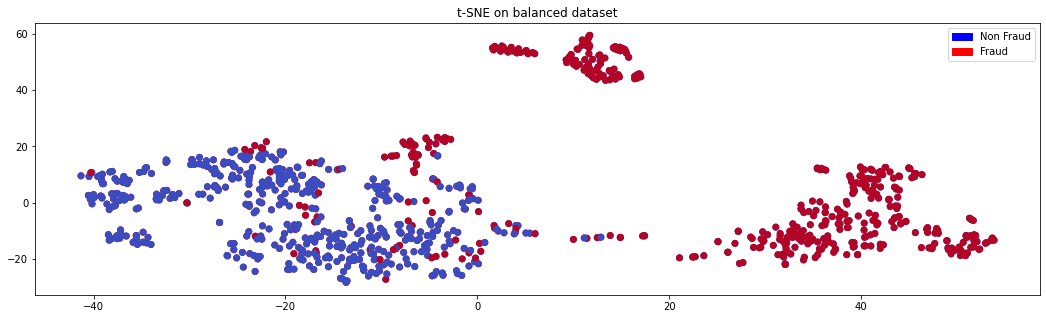

In [298]:
f, ax1 = plt.subplots(1, figsize=(18,5))

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('t-SNE on balanced dataset', fontsize=12)

ax1.legend(handles=(labels))

plt.show()

#### Defining helper functions for the classifications

In [9]:
def plot_confusion_matrix(cm,target_names = ['Normal', 'Outlier'], title='Confusion matrix'):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    
    cmap = plt.get_cmap('Blues')
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
        
    #fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [10]:
 def plot_roc_curve(y_test, y_pred):   
     
      
    plt.figure(figsize=(8,6))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred)

    plt.plot(fpr,tpr,linewidth=2, label="ROC-AUC="+str(round(roc_auc , 3)))
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting Fradulant Transactions')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.show()

In [11]:
 def plot_pr_curve(y_test, y_pred):   
     
      
    plt.figure(figsize=(8,6))

    precision, recall, _ = precision_recall_curve(y_test, pos_probs)
    pr_auc =  auc(recall, precision)

    plt.plot(recall, precision, marker='.', label="PR-AUC="+str(round(pr_auc , 3)))
    plt.legend(loc=4)

    plt.rcParams['font.size'] = 12
    plt.title('PR curve for Predicting Fradulant Transactions')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.show()

## 3. Supervised Clasification

In this section we will implement supervised classification algorithms to detect frauds in the dataset. Each algorithm will be evaluated based on precision, recall, f1-score, ROC AUC and PR AUC.

In [302]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1), df['Class'], test_size=0.30, shuffle=True, random_state=42)

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (198608, 29)
y_train -  (198608,)
X_test -  (85118, 29)
y_test -  (85118,)


### 3.1 Imbalanced Random Forest

In [303]:
my_model = RandomForestClassifier()
my_model.fit(X_train, y_train) 

RandomForestClassifier()

In [304]:
y_pred = my_model.predict(X_test)
yhat = my_model.predict_proba(X_test)
pos_probs = yhat[:, 1]

In [305]:
print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, pos_probs )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.94      0.73      0.82       134

    accuracy                           1.00     85118
   macro avg       0.97      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118

ROC AUC:  93.5%
PR  AUC:  82.4%


In [306]:
cm = metrics.confusion_matrix(y_test,y_pred)


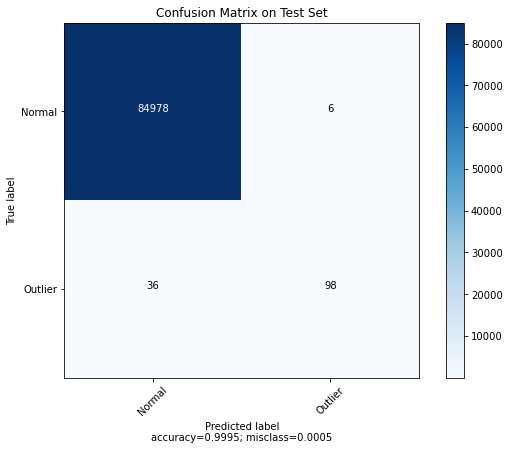

In [307]:
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

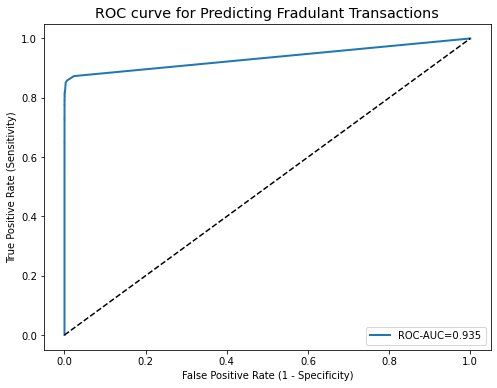

In [308]:
plot_roc_curve(y_test, pos_probs)

### 3.2 Random Forrest with Random Undersampling technique

In [310]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_rus))

Resampled dataset shape Counter({0: 339, 1: 339})


In [311]:
my_model.fit(X_train_rus, y_train_rus)
y_pred_rus = my_model.predict(X_test)
yhat = my_model.predict_proba(X_test)
pos_probs = yhat[:, 1]

In [312]:
print(classification_report(y_test, y_pred_rus))
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, pos_probs )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84984
           1       0.05      0.87      0.10       134

    accuracy                           0.97     85118
   macro avg       0.53      0.92      0.54     85118
weighted avg       1.00      0.97      0.99     85118

ROC AUC:  97.6%
PR  AUC:  74.1%


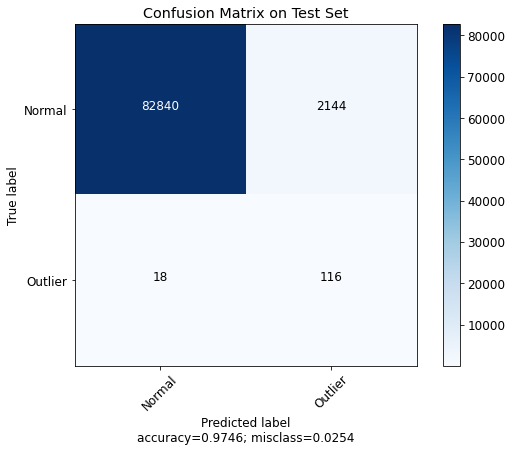

In [313]:
cm = metrics.confusion_matrix(y_test,y_pred_rus)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

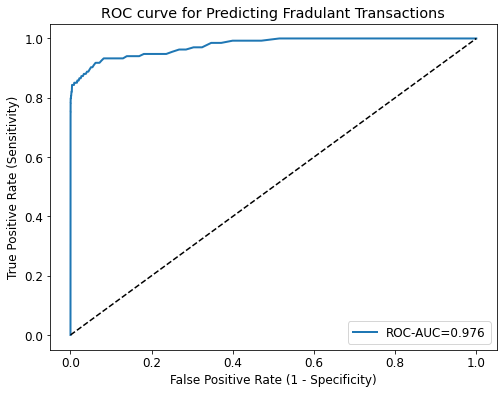

In [314]:
plot_roc_curve(y_test, pos_probs)

### 3.3 Random Forrest with SMOTE

In [315]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [316]:
my_model.fit(X_train_smote, y_train_smote)
y_pred_smote = my_model.predict(X_test)
yhat = my_model.predict_proba(X_test)
pos_probs = yhat[:, 1]

In [317]:
print(classification_report(y_test, y_pred_smote))
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, pos_probs )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.79      0.84       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118

ROC AUC:  97.3%
PR  AUC:  82.7%


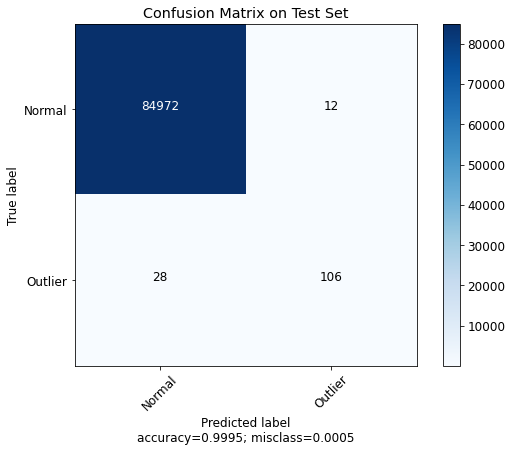

In [318]:
cm = metrics.confusion_matrix(y_test,y_pred_smote)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

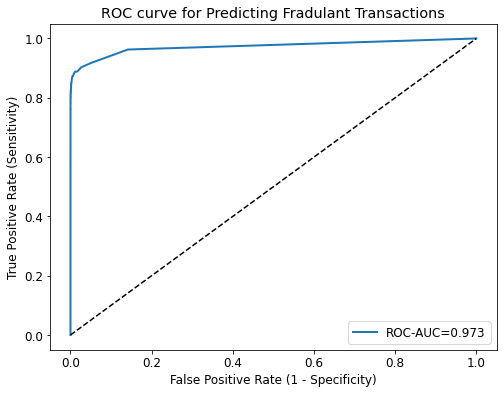

In [319]:
plot_roc_curve(y_test, pos_probs)

### 3.4 Random Forrest with ADASYN 

In [320]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Resampled dataset shape Counter({1: 198311, 0: 198269})


In [321]:
my_model.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = my_model.predict(X_test)
yhat = my_model.predict_proba(X_test)
pos_probs = yhat[:, 1]

In [322]:
print(classification_report(y_test, y_pred_adasyn))
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, pos_probs )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.91      0.79      0.84       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118

ROC AUC:  95.6%
PR  AUC:  82.2%


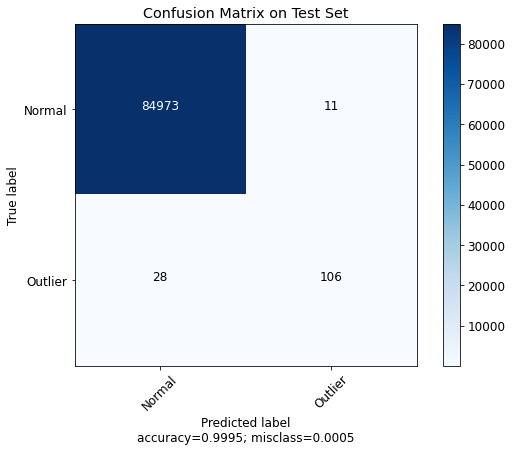

In [323]:
cm = metrics.confusion_matrix(y_test,y_pred_adasyn)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

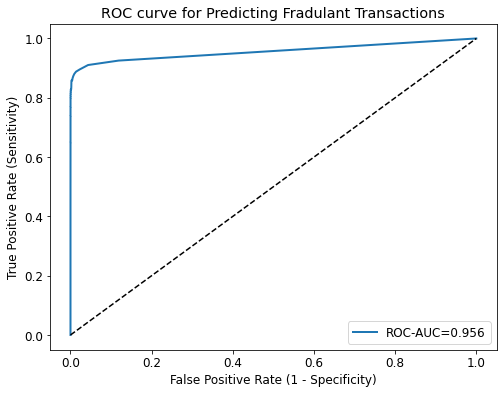

In [324]:
plot_roc_curve(y_test, pos_probs)

### Implementing various supervised models with balanced datasets

In [325]:
def build_model(models):

    results = {}
    plt.figure(figsize=(12,6))
    for name, model, X_train, y_train, X_test, y_test in models:
        
        data =[]
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        yhat = model.predict_proba(X_test)
        pos_probs = yhat[:, 1]

        # calculate accuracy
       
        Accuracy = metrics.accuracy_score(y_test, y_pred)
        data.append(Accuracy)

        # calculate roc_auc
        
        roc_auc = metrics.roc_auc_score(y_test , pos_probs)
        data.append(roc_auc)

        # calculate pr_auc

        precision, recall, _ = precision_recall_curve(y_test, pos_probs)
        pr_auc = metrics.auc(recall, precision)
        data.append(pr_auc)

        # calculate precision
       
        PrecisionScore = metrics.precision_score(y_test , y_pred)
        data.append(PrecisionScore)

        # calculate recall
        
        RecallScore = metrics.recall_score(y_test , y_pred)
        data.append(RecallScore)

        # calculate f1 score
        
        F1Score = metrics.f1_score(y_test , y_pred)
        data.append(F1Score)

        # populating the dictionary

        results[name] = data


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_probs)
        auc = metrics.roc_auc_score(y_test, pos_probs)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(round(auc , 3)))
    
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

    df = pd.DataFrame.from_dict(results, orient='index' , columns= ['Accuracy', 'ROC-AUC','PR-AUC', 'Precision', 'Recall' , 'F1-score'])
    
    return df 

### 3.5 Grid Search with Logistic Regression

In [340]:
params = {"solver": ['lbfgs', 'liblinear','saga'],
                  "penalty": ['l2'], 
                  "C":  [0.01, 0.1, 1 ,10]}

grid = GridSearchCV(estimator= LogisticRegression(max_iter=100000), param_grid=params , n_jobs=-1 , cv=4 ,scoring = 'f1')
grid.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1')

In [341]:
grid.best_estimator_

LogisticRegression(C=0.1, max_iter=100000)

### 3.6  Grid Search with Random Forest

In [342]:
params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(4,8,1))}


grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid=params , n_jobs=-1 , cv=4 ,scoring = 'f1')
grid.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [4, 5, 6, 7]},
             scoring='f1')

In [343]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4)

### 3.7 Grid Search with K Nearest Neighbour

In [344]:
params = {"n_neighbors": list(range(2,60,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=params , n_jobs=-1 , cv=4 ,scoring = 'f1')
grid.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1')

In [345]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

### 3.8 Logistic Regression

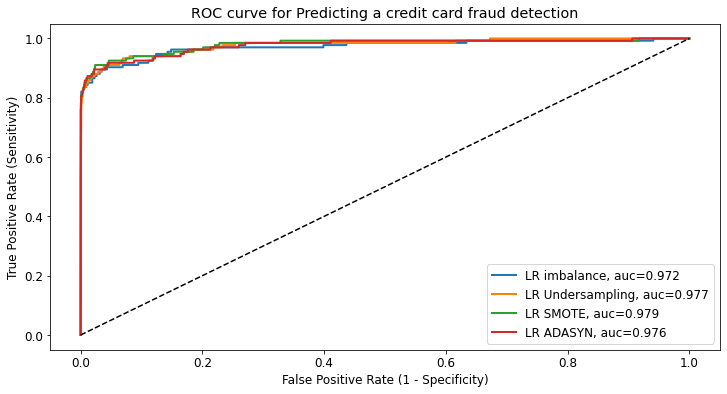

,Accuracy,ROC-AUC,PR-AUC,Precision,Recall,F1-score
LR imbalance,0.999178,0.971645,0.712808,0.880952,0.552239,0.678899
LR Undersampling,0.972755,0.977081,0.596627,0.048740,0.880597,0.092368
LR SMOTE,0.976738,0.979099,0.735661,0.057526,0.895522,0.108108
LR ADASYN,0.914166,0.976442,0.756420,0.016581,0.917910,0.032574


In [326]:
LR = []

LR.append(('LR imbalance', LogisticRegression(solver='lbfgs', max_iter= 100000 , C=0.1), X_train,y_train,X_test,y_test))
LR.append(('LR Undersampling', LogisticRegression(solver='lbfgs', max_iter= 100000, C=0.1),X_train_rus,y_train_rus,X_test,y_test))
LR.append(('LR SMOTE', LogisticRegression(solver='lbfgs', max_iter= 100000, C=0.1),X_train_smote,y_train_smote,X_test,y_test))
LR.append(('LR ADASYN', LogisticRegression(solver='lbfgs', max_iter= 100000, C=0.1),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_model(LR)

### 3.9 Random Forest

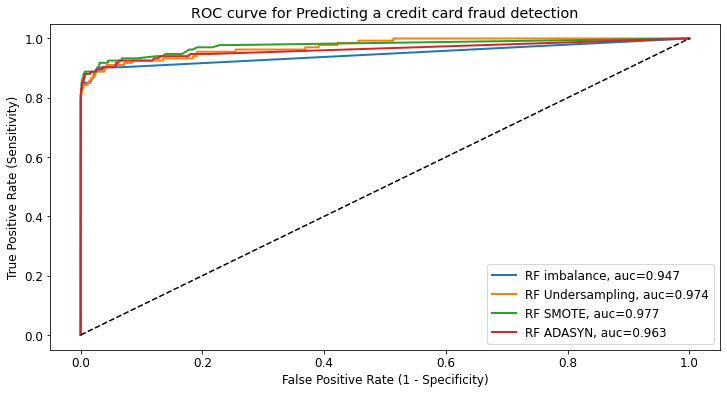

,Accuracy,ROC-AUC,PR-AUC,Precision,Recall,F1-score
RF imbalance,0.999483,0.946934,0.815005,0.941176,0.716418,0.813559
RF Undersampling,0.980768,0.973712,0.740106,0.066859,0.865672,0.124131
RF SMOTE,0.999530,0.976720,0.824949,0.891667,0.798507,0.842520
RF ADASYN,0.999507,0.963007,0.809245,0.877049,0.798507,0.835937


In [327]:
RF = []

RF.append(('RF imbalance', RandomForestClassifier(n_estimators=100 ,min_samples_leaf=4, min_samples_split=2,criterion='gini' ),X_train,y_train,X_test,y_test))
RF.append(('RF Undersampling', RandomForestClassifier(n_estimators=100 ,min_samples_leaf=4, min_samples_split=2,criterion='gini'),X_train_rus,y_train_rus,X_test,y_test))
RF.append(('RF SMOTE', RandomForestClassifier(n_estimators=100 ,min_samples_leaf=4, min_samples_split=2,criterion='gini'),X_train_smote,y_train_smote,X_test,y_test))
RF.append(('RF ADASYN', RandomForestClassifier(n_estimators=100 ,min_samples_leaf=4, min_samples_split=2,criterion='gini'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_model(RF)

### 3.10 NB Classifier

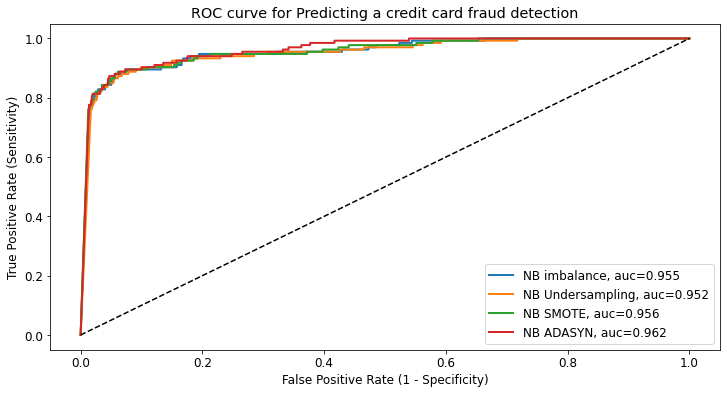

,Accuracy,ROC-AUC,PR-AUC,Precision,Recall,F1-score
NB imbalance,0.977655,0.955411,0.390944,0.053535,0.791045,0.100284
NB Undersampling,0.966165,0.951775,0.411538,0.037087,0.820896,0.070968
NB SMOTE,0.975587,0.956124,0.399863,0.050416,0.813433,0.094948
NB ADASYN,0.957671,0.962250,0.418877,0.030582,0.843284,0.059023


In [328]:
NB = []

NB.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NB.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NB.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NB.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_model(NB)

### 3.11 K-Nearest Neighbour Classifier

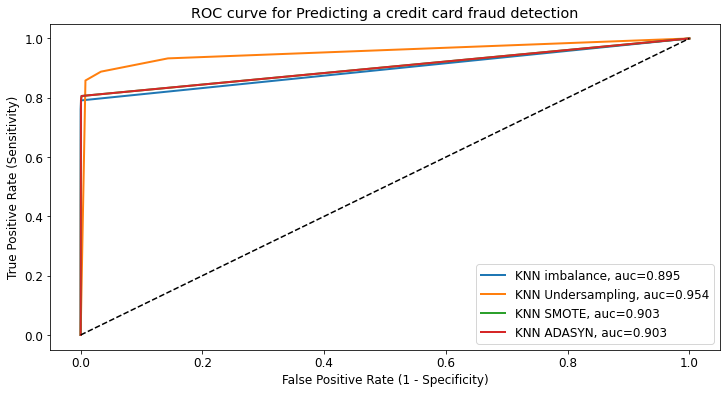

,Accuracy,ROC-AUC,PR-AUC,Precision,Recall,F1-score
KNN imbalance,0.999554,0.895429,0.841616,0.944444,0.761194,0.842975
KNN Undersampling,0.966541,0.953643,0.496196,0.040312,0.888060,0.077122
KNN SMOTE,0.998708,0.902603,0.721187,0.563158,0.798507,0.660494
KNN ADASYN,0.998708,0.902598,0.719414,0.563158,0.798507,0.660494


In [329]:
 KNN = []

KNN.append(('KNN imbalance', KNeighborsClassifier(metric='minkowski', n_neighbors=3),X_train,y_train,X_test,y_test))
KNN.append(('KNN Undersampling', KNeighborsClassifier(metric='minkowski', n_neighbors=3),X_train_rus,y_train_rus,X_test,y_test))
KNN.append(('KNN SMOTE', KNeighborsClassifier(metric='minkowski', n_neighbors=3),X_train_smote,y_train_smote,X_test,y_test))
KNN.append(('KNN ADASYN', KNeighborsClassifier(metric='minkowski', n_neighbors=3),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_model(KNN)

## 4. Unsupervised Learning Methods

In this section we will implement unsupervised classification algorithms to detect frauds in the dataset. Each algorithm will be evaluated based on precision, recall, f1-score, ROC AUC and PR AUC.

### 4.1  Deep Neural Auto-Encoders

Training our Autoencoder is gonna be a bit different from what we are used to. Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 30% of our data for testing:

In [463]:
normal = df.query('Class == 0').sample(20000)
fraud = df.query('Class == 1').sample(400)
df_new = pd.concat([normal, fraud])

In [464]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['Class'], axis = 1) , df_new['Class'], test_size=0.2, random_state=42)

print('Train samples:' , X_train.shape)
print('Test samples:' , X_test.shape)

Train samples: (16320, 29)
Test samples: (4080, 29)


In [134]:
encoding_dim = 16
input_dim = X_train.shape[1]

inputArray = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(inputArray)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(encoding_dim, activation='relu')(decoded)
decoded = Dense(input_dim, activation='relu')(decoded)

autoencoder = Model(inputArray, decoded)
autoencoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_34 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_35 (Dense)             (None, 29)              

In [135]:
autoencoder.compile(optimizer=RMSprop(), 
                    loss='mean_squared_error',
                    metrics=['mae', 'accuracy'])

In [136]:
batch_size = 32
epochs = 30

history = autoencoder.fit(X_train, X_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format("deepautoencoder"))])

Epoch 1/30
510/510 [==============================] - 2s 3ms/step - loss: 1.5329 - mae: 0.6776 - accuracy: 0.1412 - val_loss: 1.5068 - val_mae: 0.6723 - val_accuracy: 0.2010
Epoch 2/30
510/510 [==============================] - 1s 1ms/step - loss: 1.4353 - mae: 0.6533 - accuracy: 0.2688 - val_loss: 1.4547 - val_mae: 0.6549 - val_accuracy: 0.3074
Epoch 3/30
510/510 [==============================] - 1s 1ms/step - loss: 1.4013 - mae: 0.6405 - accuracy: 0.3430 - val_loss: 1.4122 - val_mae: 0.6454 - val_accuracy: 0.3228
Epoch 4/30
510/510 [==============================] - 1s 1ms/step - loss: 1.3827 - mae: 0.6338 - accuracy: 0.3377 - val_loss: 1.4037 - val_mae: 0.6397 - val_accuracy: 0.3368
Epoch 5/30
510/510 [==============================] - 1s 1ms/step - loss: 1.3781 - mae: 0.6299 - accuracy: 0.3474 - val_loss: 1.3984 - val_mae: 0.6364 - val_accuracy: 0.3395
Epoch 6/30
510/510 [==============================] - 1s 1ms/step - loss: 1.3759 - mae: 0.6270 - accuracy: 0.3510 - val_loss: 1.39

In [137]:
y_pred = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - y_pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})


In [138]:
error_df.describe()

,Reconstruction_error,True_class
count,4080.000000,4080.000000
mean,1.296509,0.022794
std,6.356299,0.149265
min,0.072537,0.000000
25%,0.298920,0.000000
50%,0.493060,0.000000
75%,0.766947,0.000000
max,150.088718,1.000000


In [153]:
threshold = 3
y_label = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]

In [154]:
print(classification_report(y_test, y_label))
precision, recall, _ = precision_recall_curve(y_test, y_label)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_label )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3987
           1       0.43      0.82      0.56        93

    accuracy                           0.97      4080
   macro avg       0.71      0.90      0.77      4080
weighted avg       0.98      0.97      0.98      4080

ROC AUC:  89.6%
PR  AUC:  62.5%


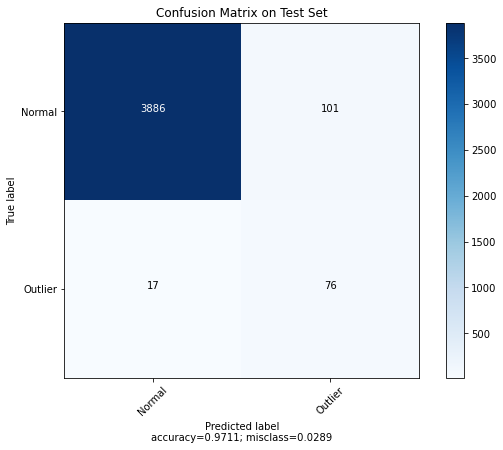

In [155]:
cm = metrics.confusion_matrix(y_test,y_label)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.2  Sparse Auto-Encoders

In [173]:
encoding_dim = 16
input_dim = X_train.shape[1]

inputArray = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(inputArray)
encoded = Dense(8, activation='tanh')(encoded)
encoded = Dense(4, activation='tanh')(encoded)

decoded = Dense(8, activation='tanh')(encoded)
decoded = Dense(encoding_dim, activation='tanh')(decoded)
decoded = Dense(input_dim, activation='tanh')(decoded)

autoencoder = Model(inputArray, decoded)
autoencoder.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_52 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_53 (Dense)             (None, 29)              

In [174]:
autoencoder.compile(optimizer=RMSprop(), 
                    loss='mean_squared_error',
                    metrics=['mae', 'accuracy'])

In [185]:
batch_size = 32
epochs = 50

history = autoencoder.fit(X_train, X_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format("deepautoencoder"))])

Epoch 1/50
510/510 [==============================] - 1s 2ms/step - loss: 1.1869 - mae: 0.5236 - accuracy: 0.4140 - val_loss: 1.1691 - val_mae: 0.5339 - val_accuracy: 0.3966
Epoch 2/50
510/510 [==============================] - 1s 1ms/step - loss: 1.1855 - mae: 0.5230 - accuracy: 0.4141 - val_loss: 1.1689 - val_mae: 0.5326 - val_accuracy: 0.3934
Epoch 3/50
510/510 [==============================] - 1s 1ms/step - loss: 1.1847 - mae: 0.5221 - accuracy: 0.4151 - val_loss: 1.1666 - val_mae: 0.5322 - val_accuracy: 0.3985
Epoch 4/50
510/510 [==============================] - 1s 1ms/step - loss: 1.1831 - mae: 0.5214 - accuracy: 0.4142 - val_loss: 1.1668 - val_mae: 0.5325 - val_accuracy: 0.3988
Epoch 5/50
510/510 [==============================] - 1s 1ms/step - loss: 1.1818 - mae: 0.5209 - accuracy: 0.4156 - val_loss: 1.1647 - val_mae: 0.5308 - val_accuracy: 0.4039
Epoch 6/50
510/510 [==============================] - 1s 1ms/step - loss: 1.1808 - mae: 0.5203 - accuracy: 0.4184 - val_loss: 1.16

In [186]:
y_pred = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - y_pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})


In [203]:
threshold = 2.5
y_label = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]

In [204]:
print(classification_report(y_test, y_label))
precision, recall, _ = precision_recall_curve(y_test, y_label)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_label )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3987
           1       0.39      0.81      0.53        93

    accuracy                           0.97      4080
   macro avg       0.69      0.89      0.75      4080
weighted avg       0.98      0.97      0.97      4080

ROC AUC:  88.9%
PR  AUC:  60.1%


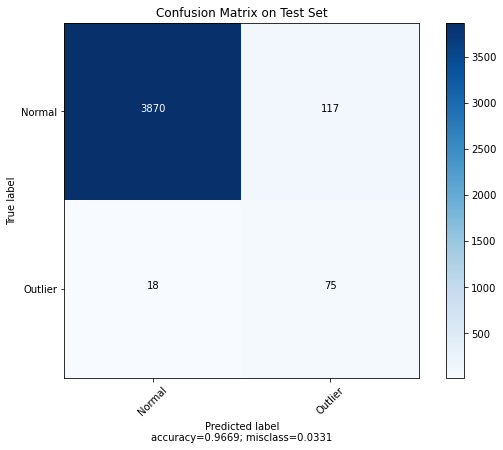

In [205]:
cm = metrics.confusion_matrix(y_test,y_label)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.3 Isolation Forest 

In [206]:
clfIF = IsolationForest(max_samples=0.5, random_state=11, contamination = 0.018 , n_estimators=1000, n_jobs=-1)

In [207]:
clfIF.fit(X_train) 

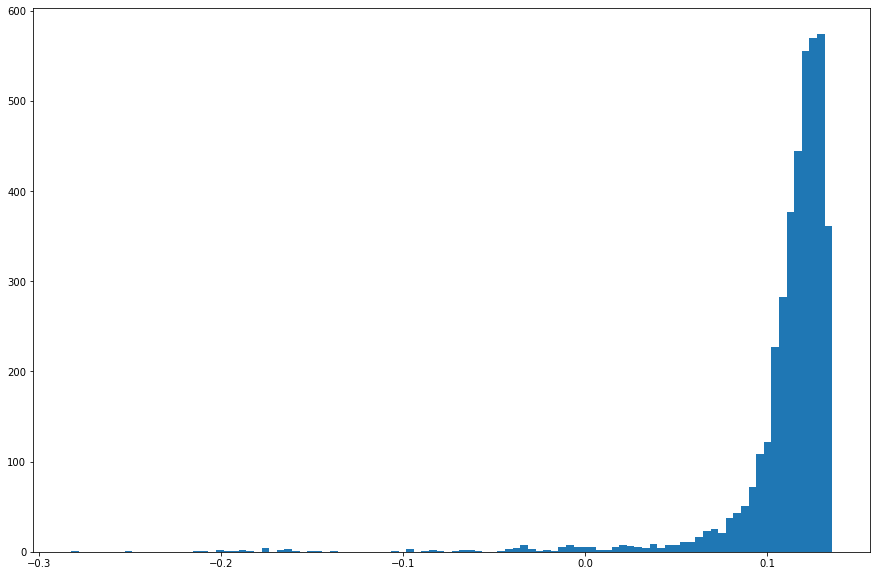

In [208]:
anomaly_scores = clfIF.decision_function(X_test)

plt.figure(figsize=(15,10))
plt.hist(anomaly_scores , bins=100)
plt.show()

In [227]:
y_pred = anomaly_scores < 0.03

print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.992     0.986     0.989      3987
           1      0.526     0.645     0.580        93

    accuracy                          0.979      4080
   macro avg      0.759     0.816     0.784      4080
weighted avg      0.981     0.979     0.980      4080

ROC AUC:  81.6%
PR  AUC:  59.0%


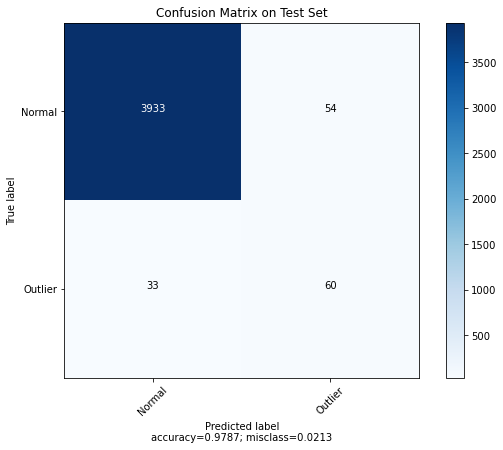

In [228]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.4 One Class SVM

In [468]:
nu = y_train.sum() / y_train.shape[0]

my_model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.05)  
my_model.fit(X_train)

OneClassSVM(gamma=0.05, nu=0.01881127450980392)

In [469]:
y_pred = my_model.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [470]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.992     0.950     0.971      3987
           1      0.244     0.688     0.361        93

    accuracy                          0.944      4080
   macro avg      0.618     0.819     0.666      4080
weighted avg      0.975     0.944     0.957      4080

ROC AUC:  81.9%
PR  AUC:  47.0%


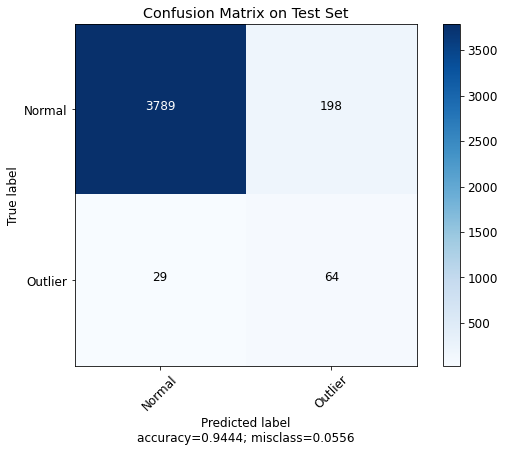

In [471]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.5 Elliptic Envelope

In [442]:
my_model = EllipticEnvelope(contamination=nu, support_fraction=1)
my_model.fit(X_train)

EllipticEnvelope(contamination=0.01881127450980392, support_fraction=1)

In [443]:
y_pred = my_model.predict(X_test)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [444]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.992     0.994     0.993      3987
           1      0.718     0.656     0.685        93

    accuracy                          0.986      4080
   macro avg      0.855     0.825     0.839      4080
weighted avg      0.986     0.986     0.986      4080

ROC AUC:  82.5%
PR  AUC:  69.1%


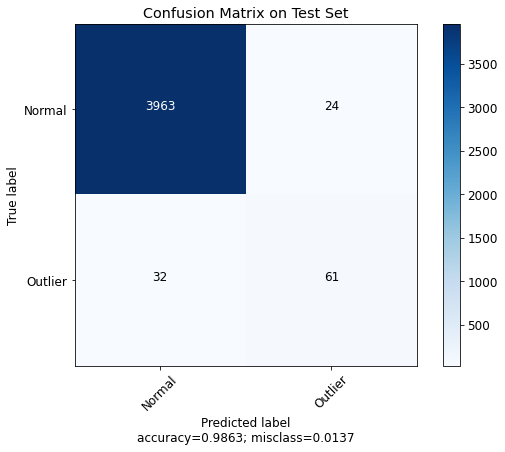

In [445]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.6 K-means clustring

In [261]:
data = np.array(df_new).astype(float)
target_column = df_new['Class']

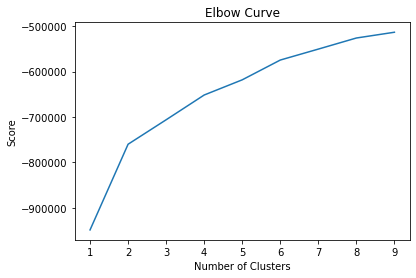

In [265]:
#in the beginning let us obtain the right number of clusters 
km = KMeans(n_clusters=6, random_state=42).fit(data)
r = range(1,10)
km = [KMeans(n_clusters=i) for i in r]

score = [km[i].fit(data).score(data) for i in range(len(km))]

plt.plot(r,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [266]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(data, target_column, test_size=0.3, random_state=0)

In [271]:
def kmeans(x_train, x_test, y_test, n_clusters):
    
    km = MiniBatchKMeans(n_clusters = n_clusters, random_state=42 , batch_size=2050).fit(X_train)

   
    clusters = km.predict(X_test) #prediction
    cc = km.cluster_centers_ ##cc is cluster center

    #calculating distance from cluster center
    dist = [np.linalg.norm(x-y) for x, y in zip(X_test, cc[clusters])] 

   
    y_pred = np.array(dist)
    y_pred[dist >= np.percentile(dist, 95)] = 1
    y_pred[dist < np.percentile(dist, 95)] = 0

    return y_pred

In [272]:
y_pred = kmeans(X_train, X_test, y_test, 20)

print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6013
           1       0.24      0.67      0.35       107

    accuracy                           0.96      6120
   macro avg       0.61      0.82      0.66      6120
weighted avg       0.98      0.96      0.97      6120

ROC AUC:  81.7%
PR  AUC:  45.7%


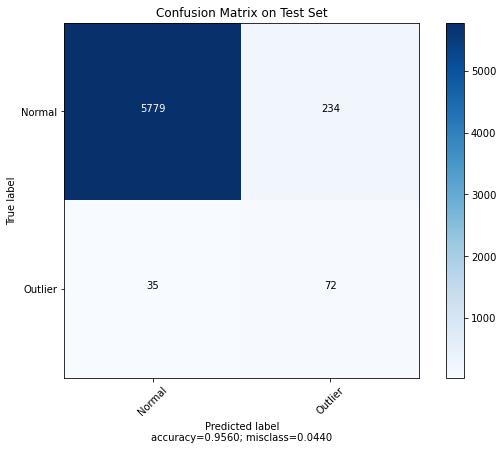

In [273]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

In [274]:
y_pred = kmeans(X_train, X_test, y_test, 2)

print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6013
           1       0.27      0.78      0.40       107

    accuracy                           0.96      6120
   macro avg       0.63      0.87      0.69      6120
weighted avg       0.98      0.96      0.97      6120

ROC AUC:  86.9%
PR  AUC:  52.5%


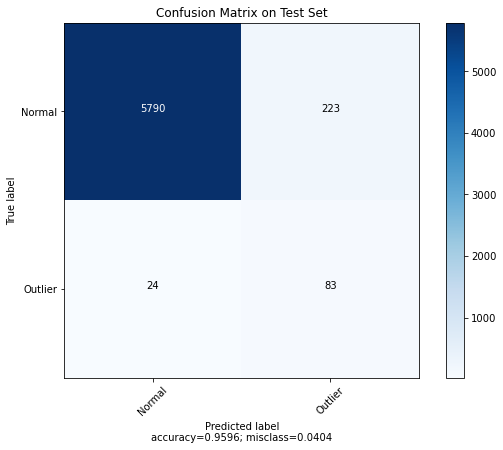

In [275]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

### 4.7 Local Outliner Factor (LOF)

In [23]:
# For debugging: take only 10 % of the dataset:
#df2 = df.sample(frac=1 , random_state= 42)

#n = df2.shape[0]

X = df.iloc[:, :-1].to_numpy()
y = df["Class"].to_numpy()

# Using train_test_split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True, random_state=42)

#### Below are the testing for n_neighbours = 5

In [24]:
k = 5

# Train the classifier:
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.0016, novelty=True)

clf.fit(X_train)

# Test the classifier:
y_pred = clf.predict(X_test)

In [25]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [26]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.998     0.998     0.998     84984
           1      0.000     0.000     0.000       134

    accuracy                          0.997     85118
   macro avg      0.499     0.499     0.499     85118
weighted avg      0.997     0.997     0.997     85118

ROC AUC:  49.9%
PR  AUC:  0.1%


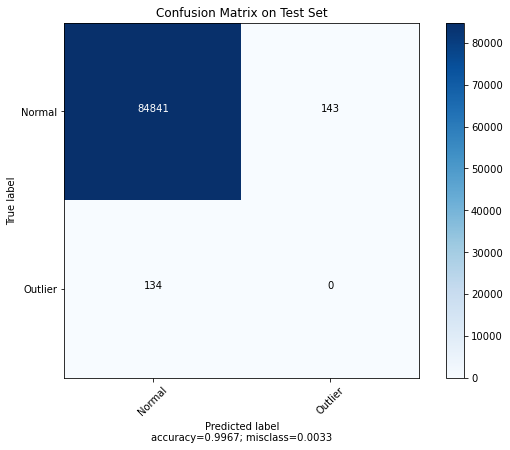

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

#### Below are the testing for n_neighbours = 500

In [12]:
k = 500

# Train the classifier:
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.0016, novelty=True)

clf.fit(X_train)

# Test the classifier:
y_pred = clf.predict(X_test)

In [13]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [14]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     84984
           1      0.581     0.507     0.542       134

    accuracy                          0.999     85118
   macro avg      0.790     0.753     0.771     85118
weighted avg      0.999     0.999     0.999     85118

ROC AUC:  75.3%
PR  AUC:  54.5%


#### Below are the testing for n_neighbours = 100

In [38]:
X = df.iloc[:, :-1].to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True, random_state=42)

In [39]:
k = 100

# Train the classifier:
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.0016, novelty=True)

clf.fit(X_train)

# Test the classifier:
y_pred = clf.predict(X_test)

In [40]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [41]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.998     0.998     0.998     84984
           1      0.008     0.007     0.008       134

    accuracy                          0.997     85118
   macro avg      0.503     0.503     0.503     85118
weighted avg      0.997     0.997     0.997     85118

ROC AUC:  50.3%
PR  AUC:  0.8%


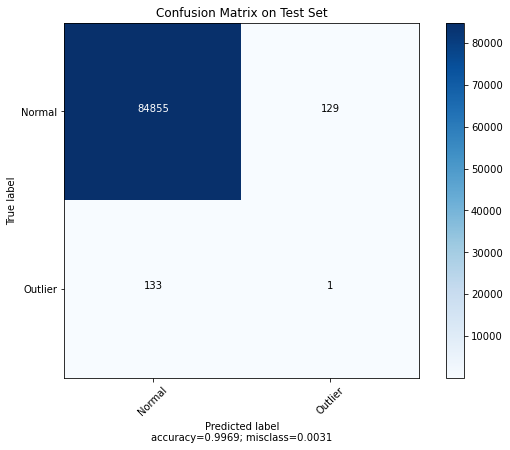

In [42]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

#### Below are the testing for n_neighbours = 300

In [72]:
X = df.iloc[:, :-1].to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True, random_state=42)

In [73]:
k = 300

# Train the classifier:
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.0016, novelty=True)

clf.fit(X_train)

# Test the classifier:
y_pred = clf.predict(X_test)

In [74]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [75]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     84984
           1      0.206     0.194     0.200       134

    accuracy                          0.998     85118
   macro avg      0.603     0.596     0.599     85118
weighted avg      0.997     0.998     0.998     85118

ROC AUC:  59.6%
PR  AUC:  20.1%


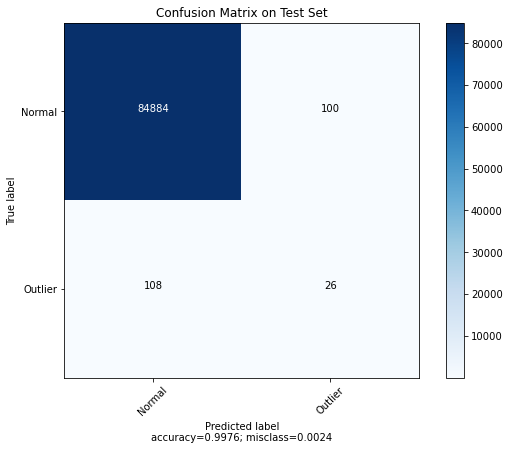

In [76]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

#### Below are the testing for n_neighbours = 1000

In [12]:
X = df.iloc[:, :-1].to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=True, random_state=42)

In [13]:
k = 1000

# Train the classifier:
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.0016, novelty=True)

clf.fit(X_train)

# Test the classifier:
y_pred = clf.predict(X_test)

In [14]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [15]:
print(classification_report(y_test, y_pred , digits=3))
precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("ROC AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred )))
print ("PR  AUC: ", "{:.1%}".format(auc(recall, precision)))

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     84984
           1      0.550     0.530     0.540       134

    accuracy                          0.999     85118
   macro avg      0.775     0.765     0.770     85118
weighted avg      0.999     0.999     0.999     85118

ROC AUC:  76.5%
PR  AUC:  54.0%


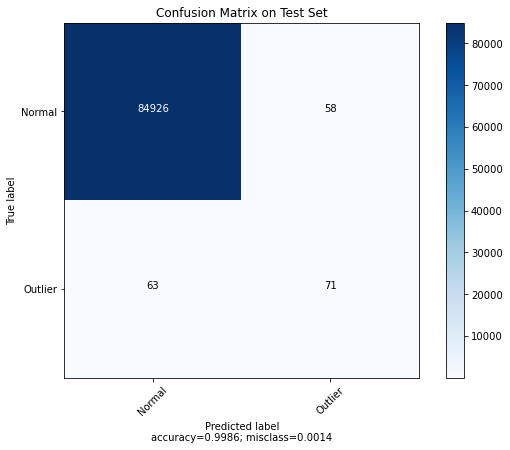

In [16]:
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, title = "Confusion Matrix on Test Set")

## 5. Conclusion

Anomaly(outlier) detection is defined as the practice of finding observations that does not conform to the expected pattern of other data instances. These outliers can cause adverse events such asfraudulent activities in banking systems. Due to huge monetary loss to individuals and banks, fraud detection is one of the most researched areas in anomaly detection .In this project, various supervised and unsupervised techniques were experimented and their performance measures were com-pared. By opting the tuned, appropriate parameters, conventional supervised methods, when training in a balanced mode, can result accurate and descent classification outcome. the problem with supervised methods is their need for accurate labels which is impractical in many applications. Furthermore, the nature of fraudulent transactions(anomalies) is constantly changing, making it difficult for supervised techniques to find anomalies. On the other hand, the biggest advantage of unsupervised methods is that they do not need fully labelled dataset. However, The biggest challenge of majority of these techniques is the selection of appropriate threshold and hyper-parameter tuning to achieve the optimal results. In other words, the expert needs to have abroad domain-knowledge about the application he is using these algorithms for. In many scenarios, although we are successful in detecting anomalies, the rate of false positives is high meaningthere exist many normal instances that are categorized as anomaly.